## 2륜차 등록대수

### 시각화 전략
* 시각화의 목표 : 코로나의 배달 이륜차 등록대수 관계
* 시각화의 범위 : 부산광역시
* 시각화의 개발절차 : kosis.kr 에서 데이터 확보, 분석 후 시각화
    
### 시각화 요구사항
* 사용자 수준 / 취향 / 목적 : 배달 알바를 해야 하는가 고민 중인 성인.
* 시나리오 / 스토리보드 개발 : 코로나 전에 비해 코로나 기간중 폭발적 증가세 보임. 코로나 이후 다시 급격한 감소세. 코로나 이전보다는 많지만 많이 빠졌음.

### 데이터 시각화 명세서
* 시각화 표현의 형태, 규칙, 패턴, 상호작용 : 5년간 각 구의 년도별 이륜차 대수 변화, 이륜차 크기별 대수 변화

### 시각화 명세서 기반 설계
* 시각화 UI 설계 : 좌, 우로 나누어 좌측에 5개년 각 구별 이륜차 대수 변화 lineplot, 우측에 5개년 크기별 이륜차 대수 변화 lineplot

In [13]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

current_font_list= matplotlib.rcParams['font.family']

font_path ="C:\Windows\Fonts\GULIM.TTC"
kfont = matplotlib.font_manager.FontProperties(fname= font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

### 2018-2022(5개년) 각 시군구별 이륜차 계 변화 추이

C:\Users\ITPS\AppData\Local\Temp\ipykernel_16552\3876212142.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsum = df5.groupby(['시점', '시군구(1)']).sum()


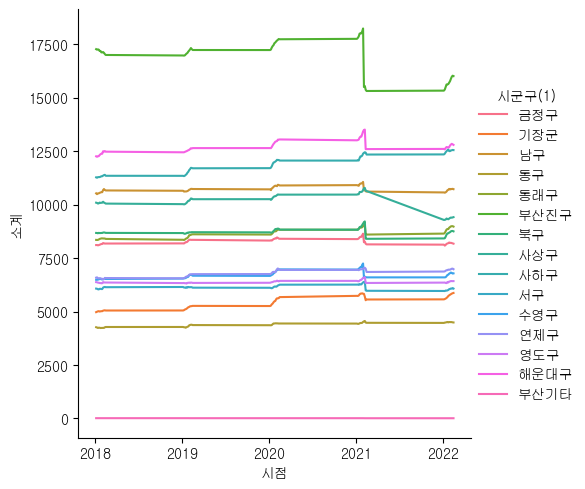

In [25]:
df5 = pd.read_csv('이륜차신고현황_시도별_5개년.csv', encoding = 'cp949', header = 1)
# print(df5)
dfsum = df5.groupby(['시점', '시군구(1)']).sum()
# print(dfsum)
sns.relplot(data = df5, x = '시점', y = '소계', hue = '시군구(1)', kind = 'line')
# sns.relplot(data = df5, x = '시점', y = '소계', col = '시군구(1)', kind = 'line', col_wrap = 3)

### 2018-2021(코로나 직전, 직후) 각 시군구별 이륜차 크기별 비율 변화 추이

C:\Users\ITPS\AppData\Local\Temp\ipykernel_16552\2822226433.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_size_sum = df_size.groupby('년').sum()


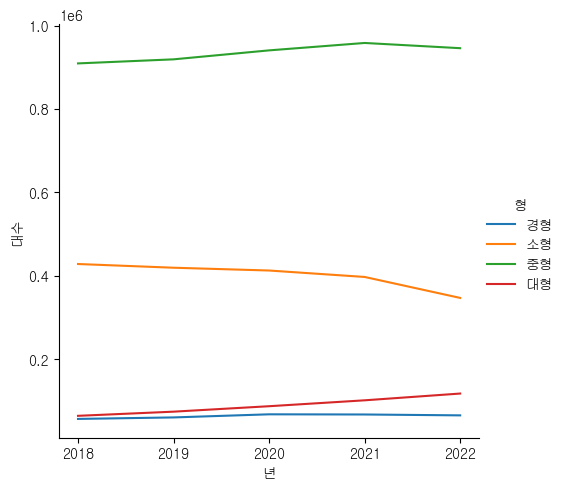

In [36]:
df_size = pd.read_csv('이륜차신고현황_시도별_5개년.csv', encoding = 'cp949', header = 1)
df_size.insert(0, '년', df_size['시점'].apply(lambda x : str(x).split('.')[0]))
df_size_sum = df_size.groupby('년').sum()
df_size_sum.drop(['시점', '소계'], axis = 1, inplace = True)
df_s = df_size_sum.stack().reset_index()
df_s.columns = ['년', '형', '대수']
sns.relplot(data = df_s, x = '년', y = '대수', hue = '형', kind = 'line')
# df_s

<AxesSubplot: xlabel='년', ylabel='대수'>

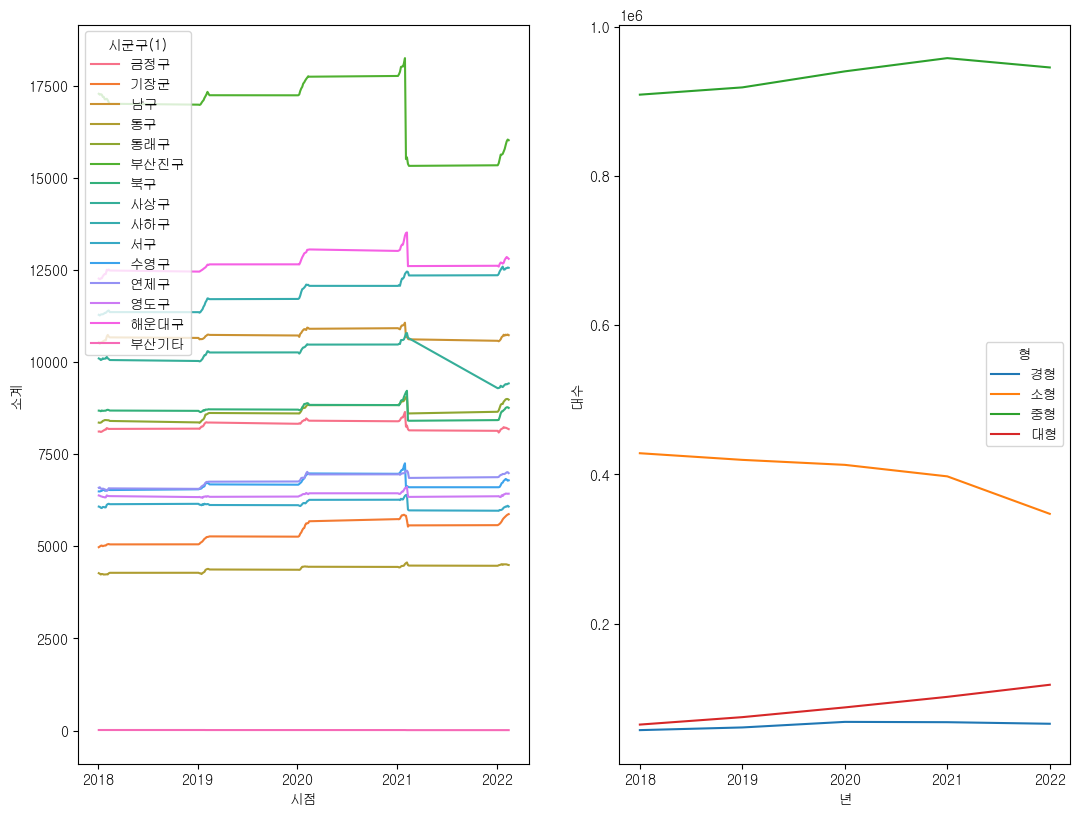

In [48]:
fig = plt.figure(figsize = (6.4 * 2, 4.8 * 2))
line1 = fig.add_subplot(1, 2, 1)
sns.lineplot(data = df5, x = '시점', y = '소계', hue = '시군구(1)', ax = line1)
line2 = fig.add_subplot(1, 2, 2)
sns.lineplot(data = df_s, x = '년', y = '대수', hue = '형', ax = line2)